In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Realizo la extracción del primer archivo Internet_Penetracion y creo el dataframe. (ETL)

### Este archivo me permite saber la pentración trimestral por provincia de cada 100 hogares con acceso a internet.

In [3]:
penetración = pd.read_csv('dataset/Internet_Penetracion.csv')
penetración.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN


In [4]:
penetración.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    object 
 4   Unnamed: 4                    0 non-null      float64
 5   Unnamed: 5                    0 non-null      float64
 6   Unnamed: 6                    0 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 47.4+ KB


### Elimino las columnas sin datos. y creo un nuevo dataFrame df_P

In [5]:


# Elimino las  columnas sin datos
df_p = penetración.dropna(axis=1, how='all')

df_p



,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"
...,...,...,...,...
859,2014,1,Santa Cruz,"28,94"
860,2014,1,Santa Fe,"47,85"
861,2014,1,Santiago Del Estero,"16,31"
862,2014,1,Tierra Del Fuego,"63,97"


In [6]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           864 non-null    int64 
 1   Trimestre                     864 non-null    int64 
 2   Provincia                     864 non-null    object
 3   Accesos por cada 100 hogares  864 non-null    object
dtypes: int64(2), object(2)
memory usage: 27.1+ KB


In [7]:
### Cambio el tipo de dato y reemplazo comas por los puntos.

df_p.loc[:, 'Accesos por cada 100 hogares'] = df_p['Accesos por cada 100 hogares'].astype(str).str.replace(',', '.').astype(float)

df_p.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           864 non-null    int64 
 1   Trimestre                     864 non-null    int64 
 2   Provincia                     864 non-null    object
 3   Accesos por cada 100 hogares  864 non-null    object
dtypes: int64(2), object(2)
memory usage: 27.1+ KB


In [8]:
df_p.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57


### Reviso a través de una grafica la distribución de los datos del campo año.


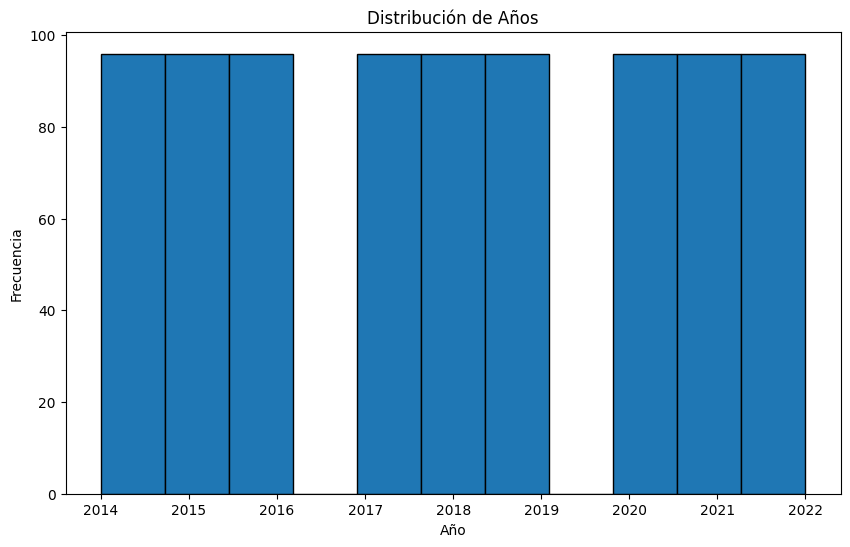

In [9]:
# Creo un histograma para la distribución de años
plt.figure(figsize=(10, 6))
plt.hist(df_p['Año'], bins='auto', edgecolor='black')

# Configuro el título y etiquetas del eje
plt.title('Distribución de Años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')


plt.show()

### Se observa en la gráfica que los años van desde el 2014 al 2022.



### Realizo una gráfica con la distribución de los datos del campo provincia .

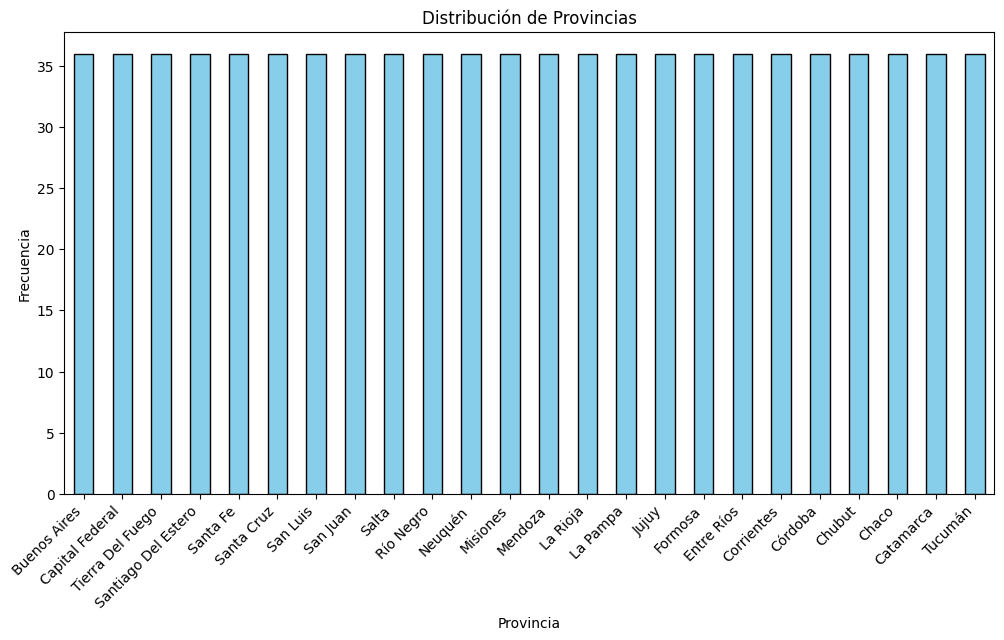

In [10]:




# Cuento la frecuencia de cada provincia
frecuencia_provincias = df_p['Provincia'].value_counts()

# Creo un gráfico de barras
plt.figure(figsize=(12, 6))
frecuencia_provincias.plot(kind='bar', color='skyblue', edgecolor='black')

# Configuro el título y etiquetas del eje
plt.title('Distribución de Provincias')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')

# Roto las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

plt.show()


### Realizo la extracción del archivo Internet_BAF02.
### En este archivo tengo la información de los accesos por año y trimestre de cada provicia y complemento la información con el archivo Internet_penetración para iniciar con el analisis camino al MVP del KPI requerido. 

In [11]:
# Realizo la extracción del archvio y creo el dataFrame penetracion_dos
penetracion_dos = pd.read_csv('dataset/Internet_BAF02.csv')
penetracion_dos.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169


In [12]:
penetracion_dos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


In [13]:
### Elimino los datos nulo o vacios del campo Dial up.
penetracion_dos = penetracion_dos.dropna(subset=['Dial up'])



In [14]:
penetracion_dos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               862 non-null    int64  
 1   Trimestre         862 non-null    int64  
 2   Provincia         862 non-null    object 
 3   Banda ancha fija  862 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             862 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 47.1+ KB


In [15]:
penetracion_dos.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169


In [16]:
penetracion_dos.tail()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
859,2014,1,Santa Cruz,26,460.0,27
860,2014,1,Santa Fe,506,612.0,507
861,2014,1,Santiago Del Estero,37,9.0,37
862,2014,1,Tierra Del Fuego,27,766.0,28
863,2014,1,Tucumán,130,88.0,130


In [17]:
penetracion_dos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               862 non-null    int64  
 1   Trimestre         862 non-null    int64  
 2   Provincia         862 non-null    object 
 3   Banda ancha fija  862 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             862 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 47.1+ KB


In [18]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           864 non-null    int64 
 1   Trimestre                     864 non-null    int64 
 2   Provincia                     864 non-null    object
 3   Accesos por cada 100 hogares  864 non-null    object
dtypes: int64(2), object(2)
memory usage: 27.1+ KB


### Fusióno los DataFrames:

### realizo un merge de los dos DataFrames (df_p y penetracion_dos) utilizando las columnas 'Año', 'Trimestre' y 'Provincia' como claves de fusión. El resultado se almacena en merged_df.

### Cálculo de Nuevo Acceso:

### calculo un nuevo acceso utilizando la fórmula proporcionada: Nuevo Acceso = (Accesos por cada 100 hogares * 100) * (1 + 0.02). Se multiplica por 100 para convertir el resultado a enteros y se almacena en la columna 'Nuevo Acceso' del DataFrame.

### Cálculo el KPI (Indicador Clave de Rendimiento):

### calculo el KPI utilizando la fórmula proporcionada: KPI = ((Nuevo Acceso - Accesos por cada 100 hogares * 100) / (Accesos por cada 100 hogares * 100)) * 100. Este valor se expresa como un porcentaje y se almacena en la columna 'KPI' del DataFrame.

### Muestro el DataFrame resultante:

### Se seleccionan las columnas relevantes ('Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares', 'Nuevo Acceso', 'KPI') y se muestra el DataFrame resultante.


In [19]:


# realizo Merge de los dos DataFrames en base a las columnas Año, Trimestre y Provincia
merged_df = pd.merge(df_p, penetracion_dos, on=['Año', 'Trimestre', 'Provincia'])

# Calculo el nuevo acceso usando la fórmula proporcionada
merged_df['Nuevo Acceso'] = ((merged_df['Accesos por cada 100 hogares'] * 100) * (1 + 0.02)).astype(int)

# Calculo el KPI usando la fórmula proporcionada
merged_df['KPI'] = ((merged_df['Nuevo Acceso'] - merged_df['Accesos por cada 100 hogares'] * 100) / (merged_df['Accesos por cada 100 hogares'] * 100)) * 100

# Muestro el DataFrame resultante con los nuevos campos calculados
merged_df[['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares', 'Nuevo Acceso', 'KPI']]


,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Nuevo Acceso,KPI
0,2022,4,Buenos Aires,78.94,8051,1.988852
1,2022,4,Capital Federal,122.73,12518,1.996252
2,2022,4,Catamarca,65.77,6708,1.99179
3,2022,4,Chaco,43.62,4449,1.994498
4,2022,4,Chubut,85.57,8728,1.998364
...,...,...,...,...,...,...
857,2014,1,Santa Cruz,28.94,2951,1.969592
858,2014,1,Santa Fe,47.85,4880,1.985371
859,2014,1,Santiago Del Estero,16.31,1663,1.961987
860,2014,1,Tierra Del Fuego,63.97,6524,1.985306


## Análisis de Datos - Gráficos de Nuevos Accesos en las Provincias (Últimos 2 Trimestres del 2022)

### El objetivo es visualizar datos específicos de un DataFrame fusionado (merged_df). filtrando y representando gráficamente los nuevos accesos en las provincias durante los dos últimos trimestres del año 2022.

### filtro el DataFrame fusionado (merged_df) para incluir solo los datos correspondientes a los dos últimos trimestres del año 2022.

### creo gráficos individuales para cada provincia presente en el conjunto de datos filtrado. Se utiliza un bucle para recorrer las provincias únicas en filtered_df_2022.

### Se genera un gráfico de barras para cada provincia, mostrando la evolución de los nuevos accesos durante los dos últimos trimestres del año 2022. 

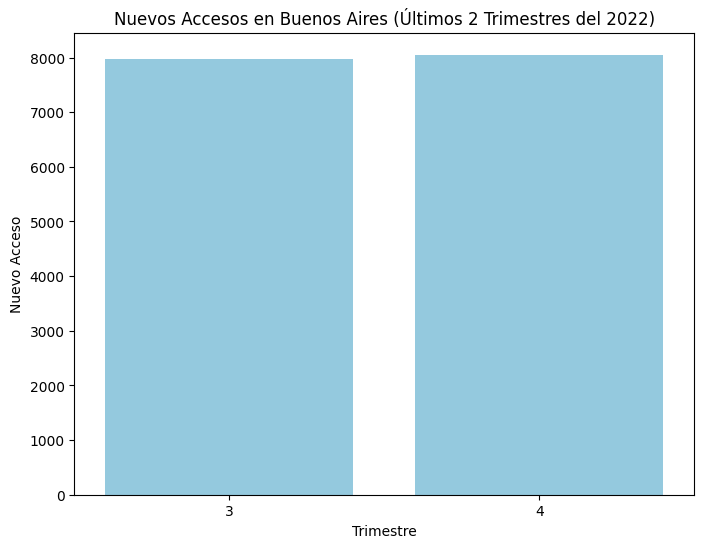

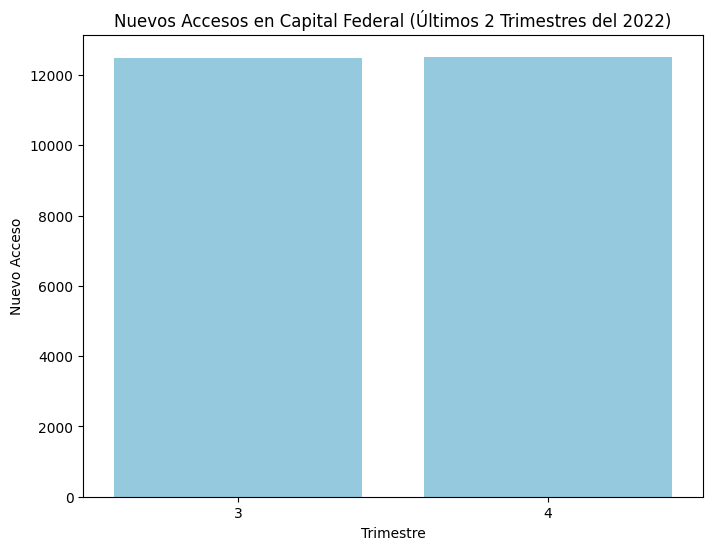

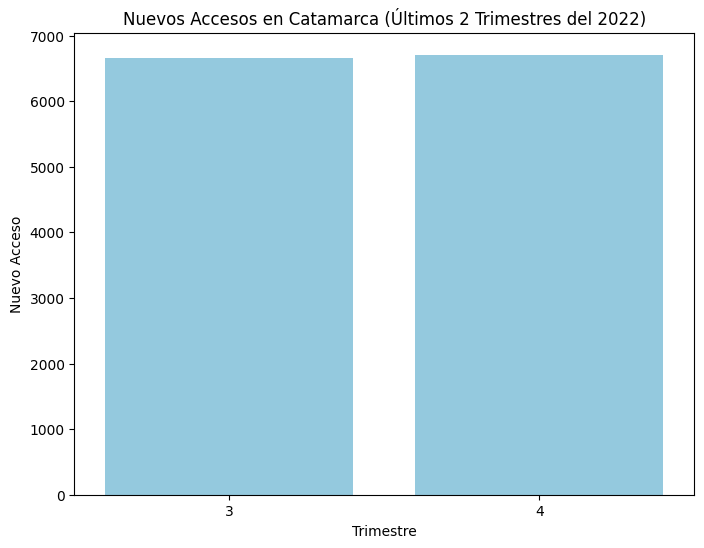

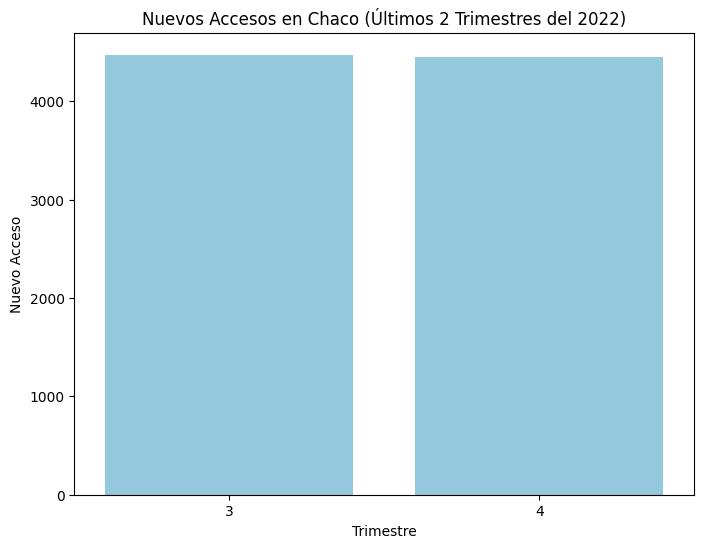

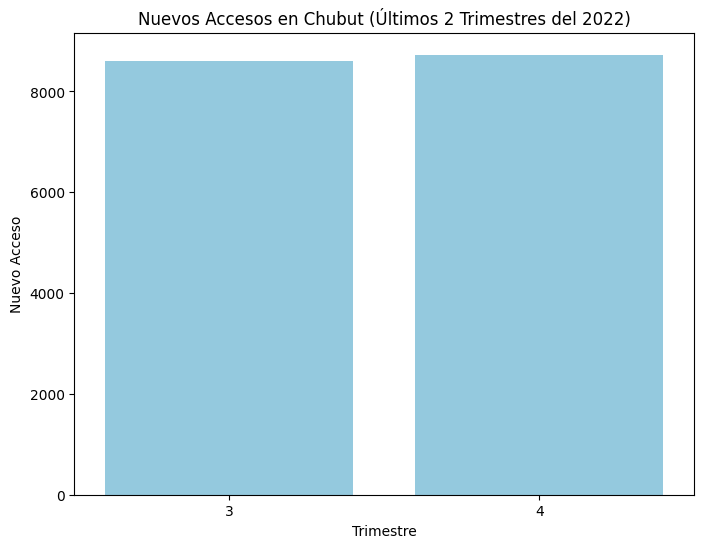

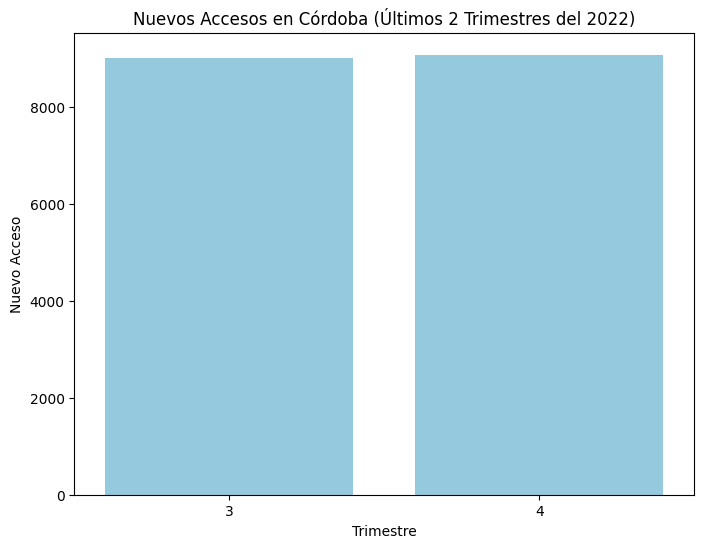

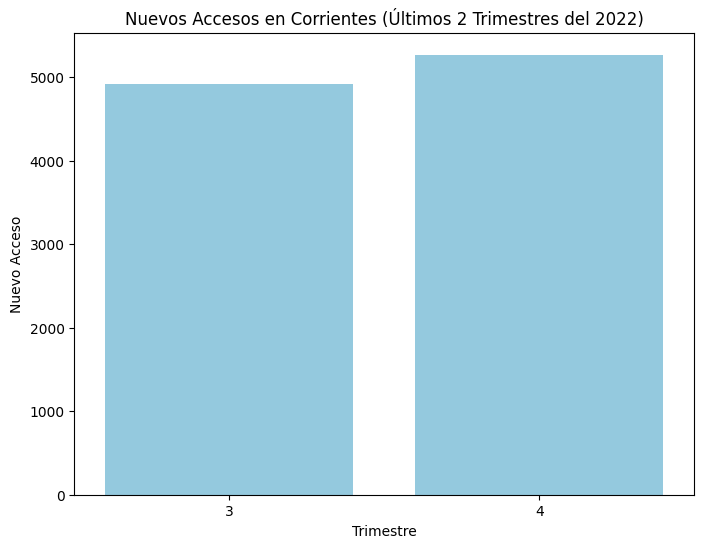

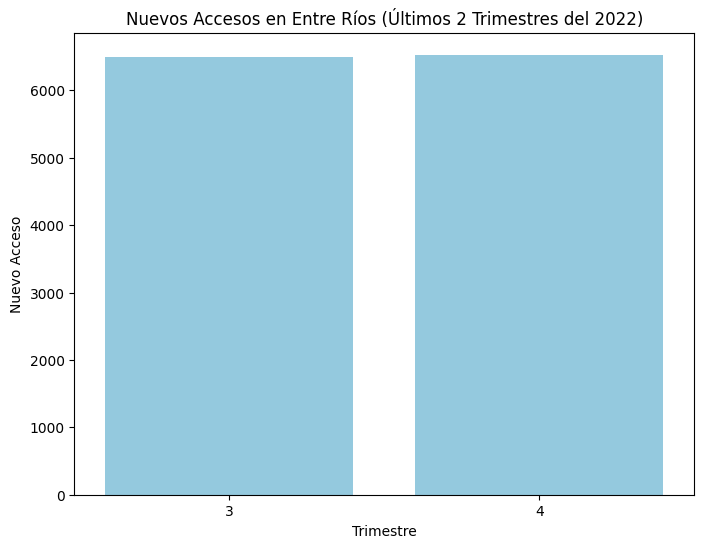

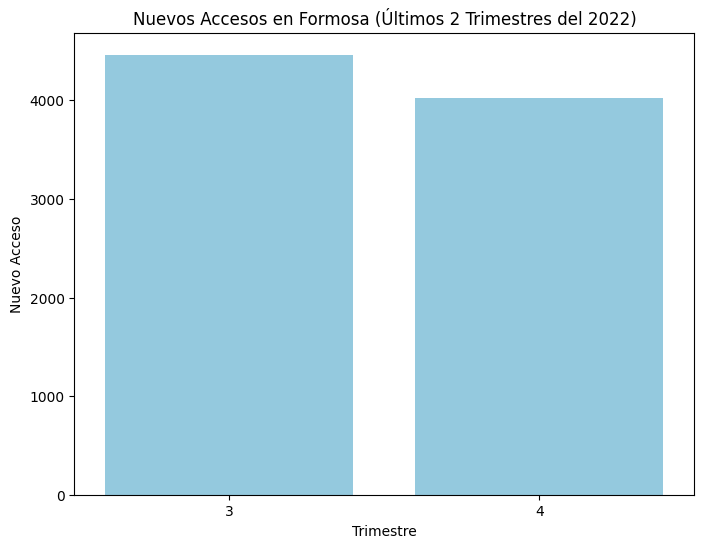

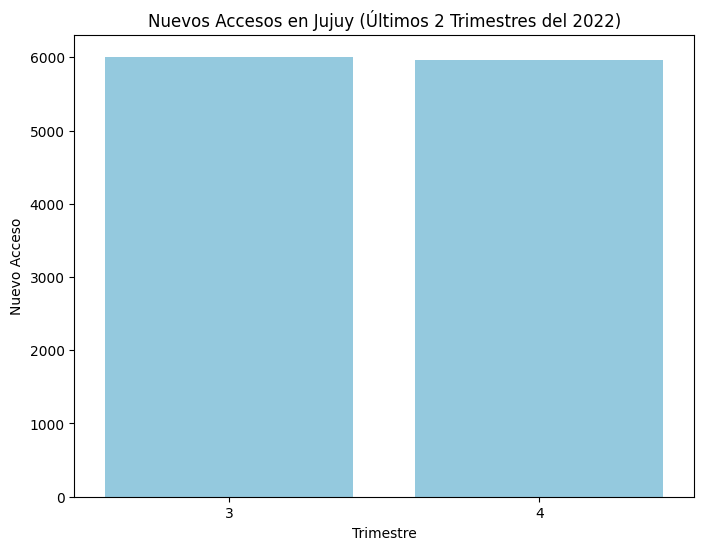

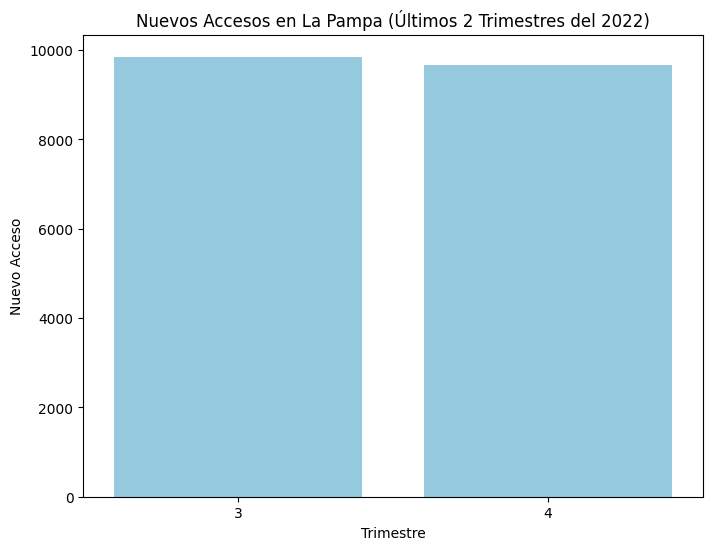

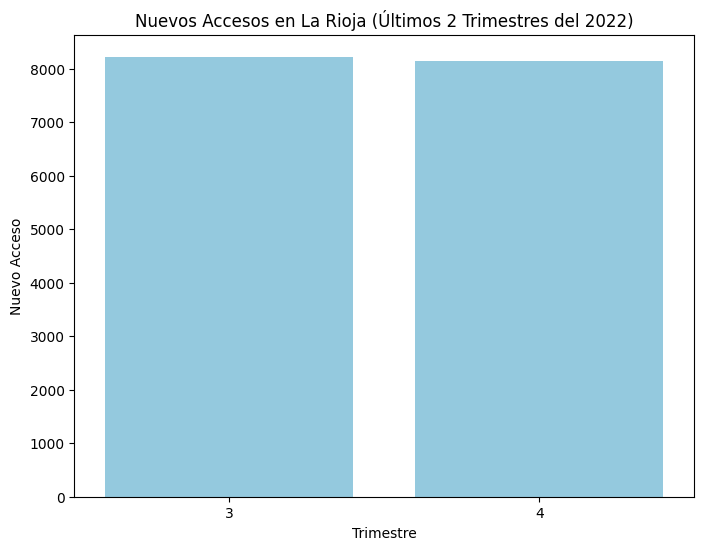

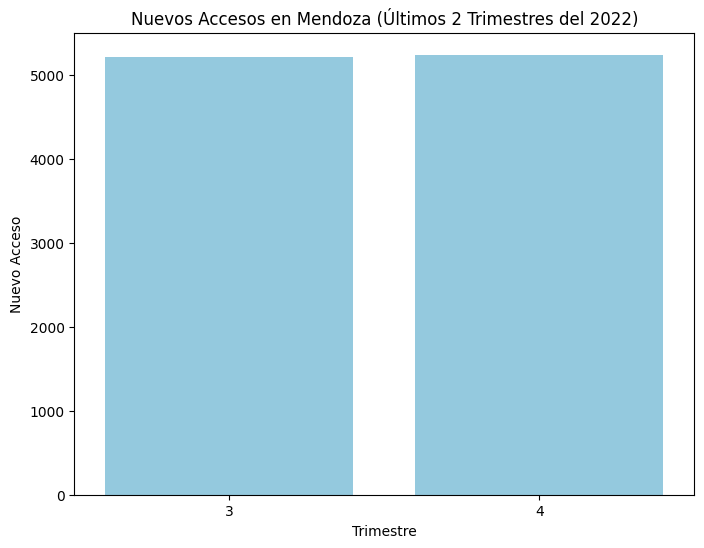

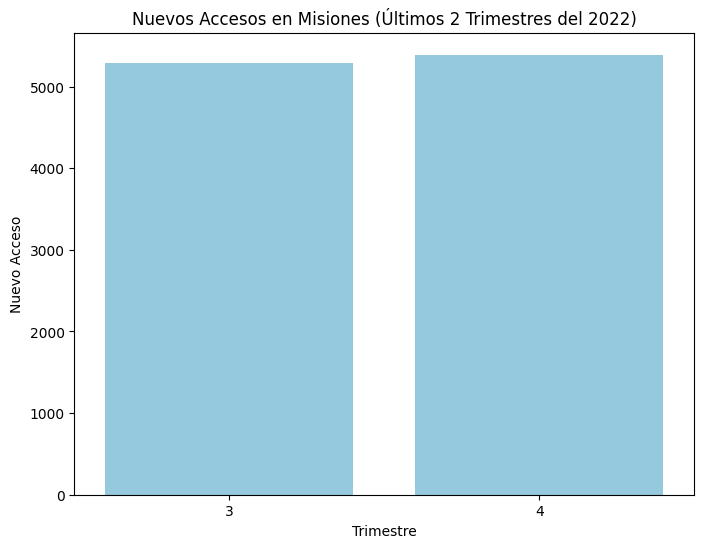

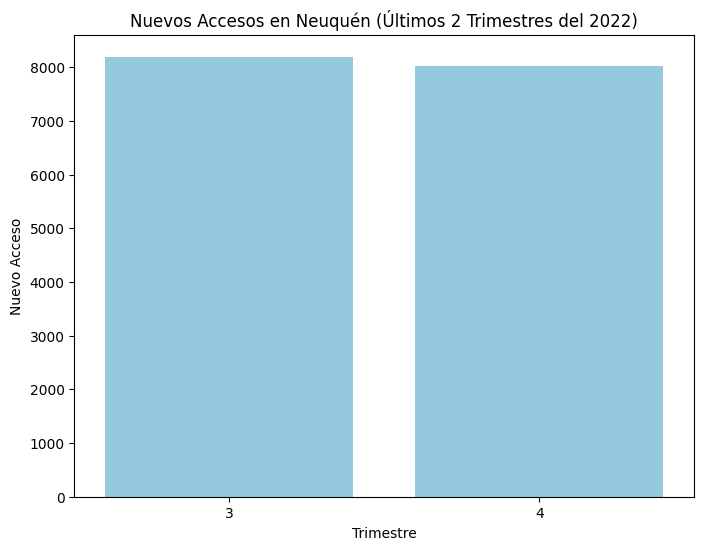

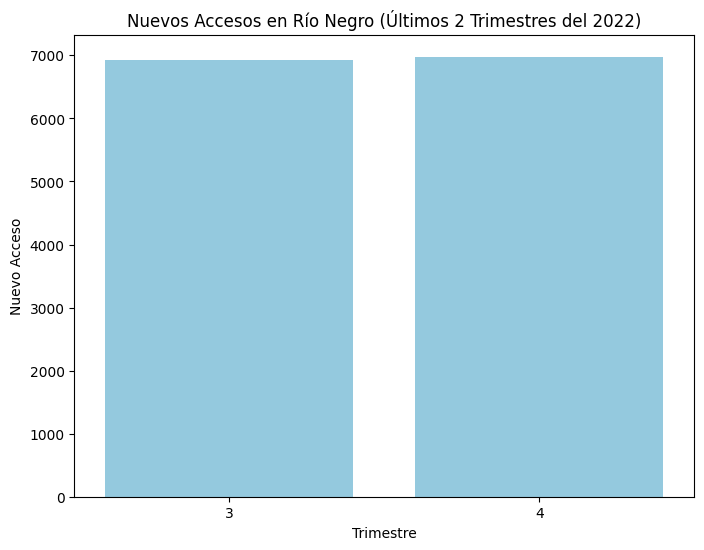

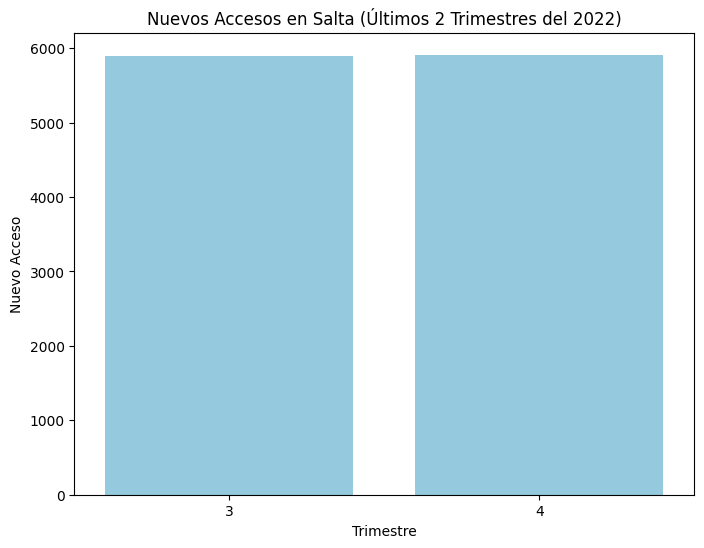

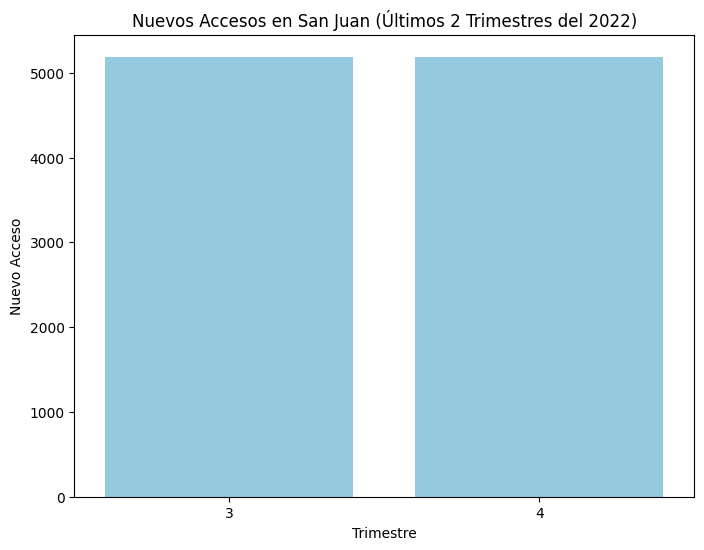

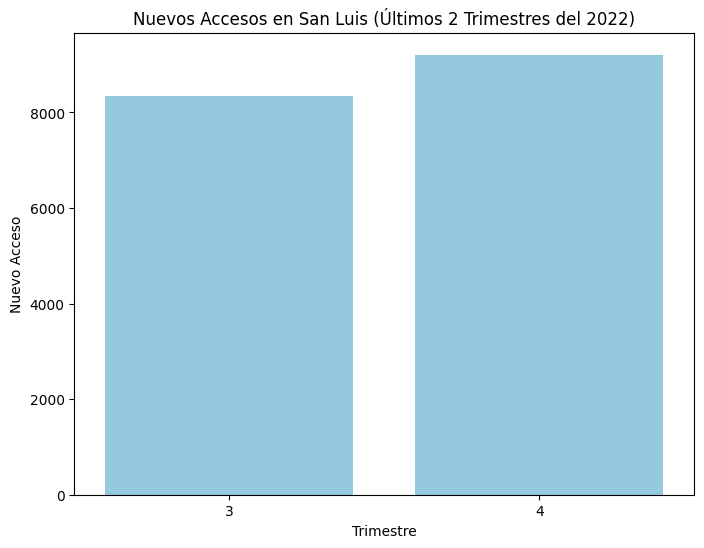

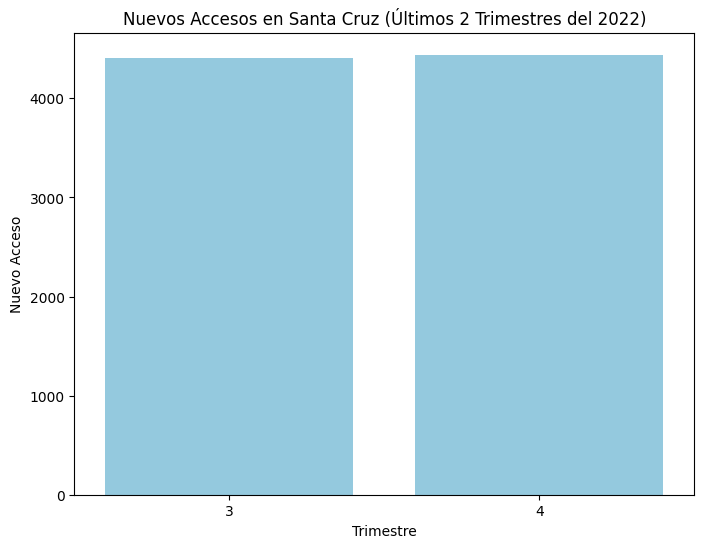

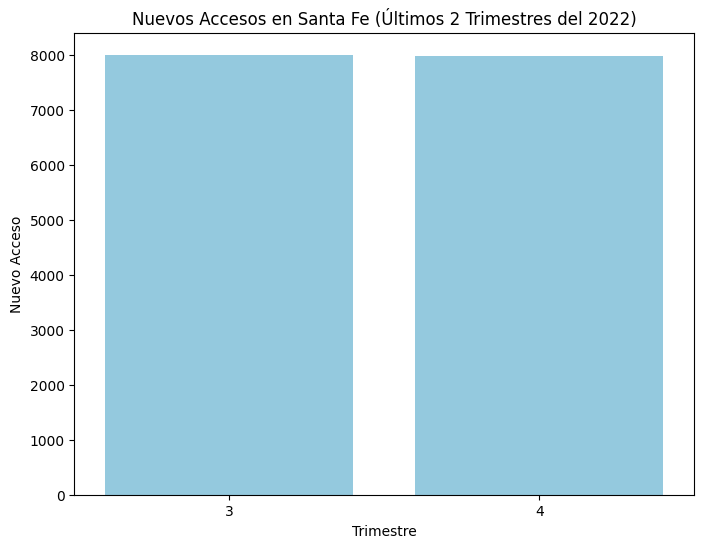

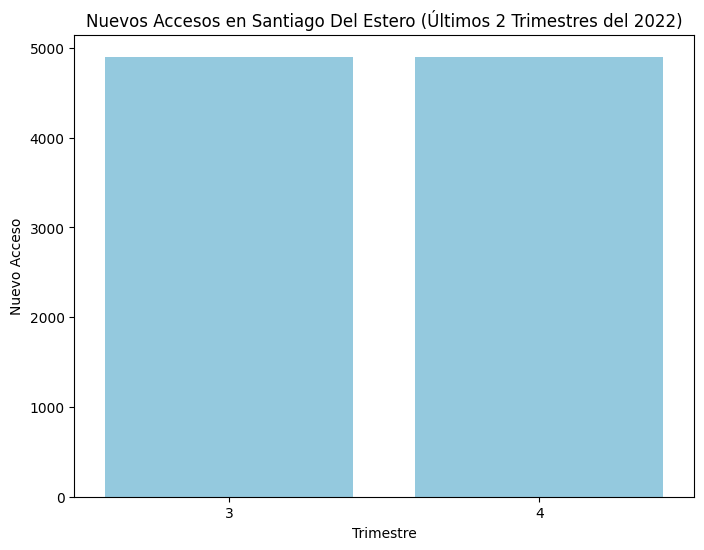

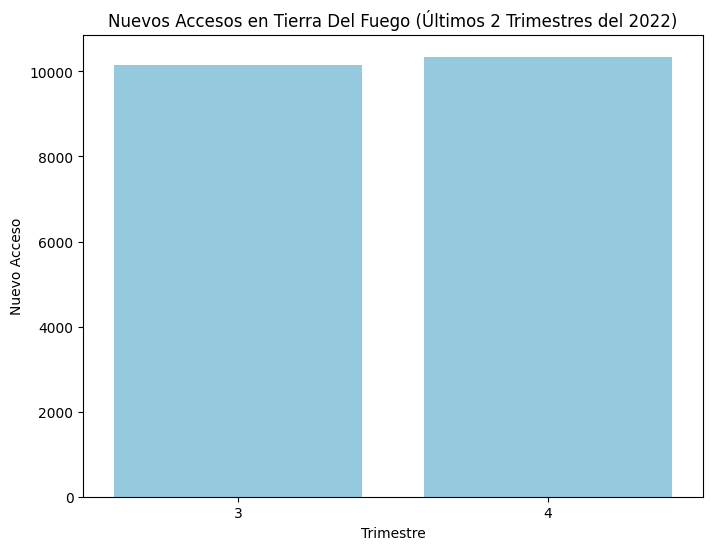

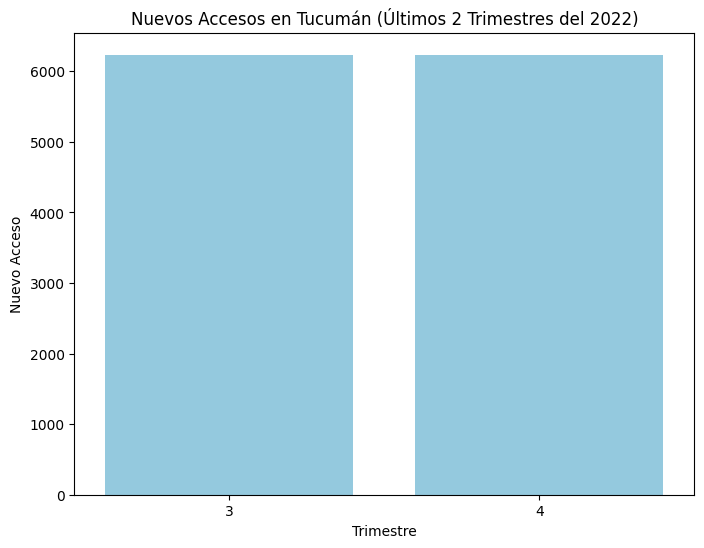

In [20]:


# Filtro los datos para incluir solo los dos últimos trimestres del año 2022
filtered_df_2022 = merged_df[(merged_df['Año'] == 2022) & ((merged_df['Trimestre'] == 3) | (merged_df['Trimestre'] == 4))]

# Creo gráficos individuales por provincia
provincias = filtered_df_2022['Provincia'].unique()

for provincia in provincias:
    provincia_df = filtered_df_2022[filtered_df_2022['Provincia'] == provincia]
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Trimestre', y='Nuevo Acceso', data=provincia_df, color='skyblue')  # Eliminé el uso de 'palette'
    plt.title(f'Nuevos Accesos en {provincia} (Últimos 2 Trimestres del 2022)')
    plt.xlabel('Trimestre')
    plt.ylabel('Nuevo Acceso')
    plt.show()


## Análisis y Visualización de la Diferencia de KPI entre dos ultimos Trimestres (2022)

### calculo la diferencia porcentual entre el tercer y cuarto trimestre para cada provincia y se agrega esta información como una nueva columna llamada 'Diferencia Porcentual'.

### genero gráficos individuales para cada provincia, mostrando la evolución del KPI entre el tercer y cuarto trimestre de 2022. Además, se añade una etiqueta indicando si la diferencia porcentual cumple o no con el KPI del 2%.

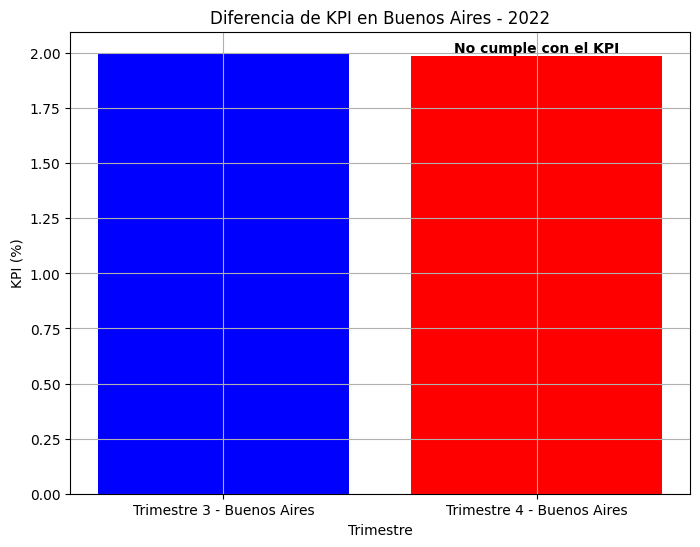

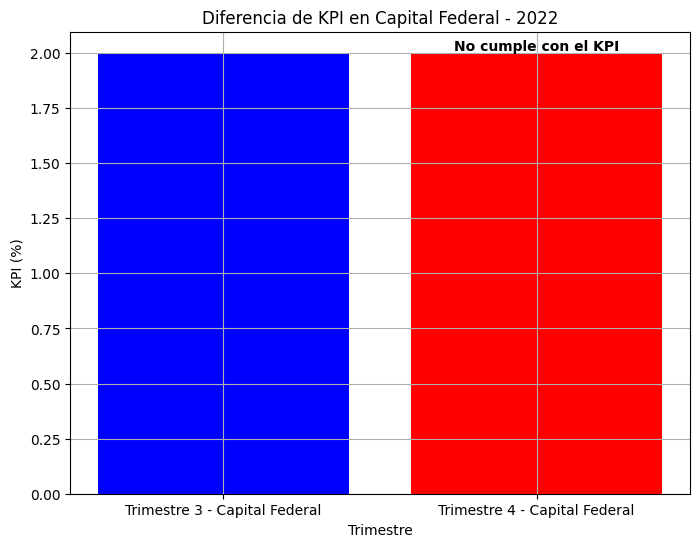

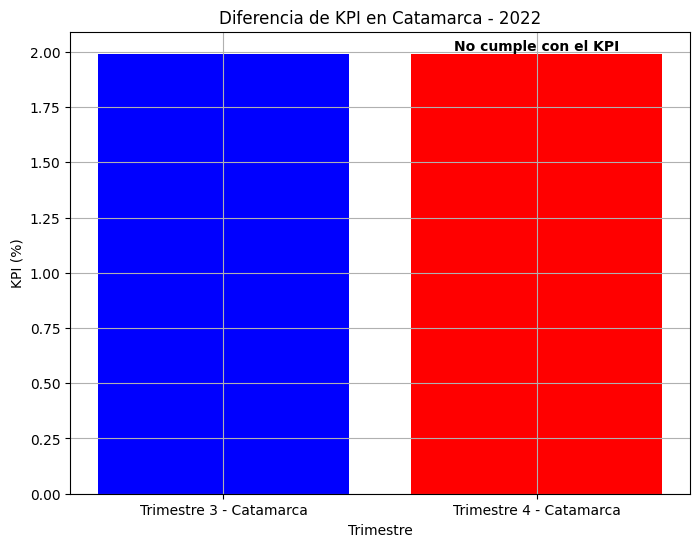

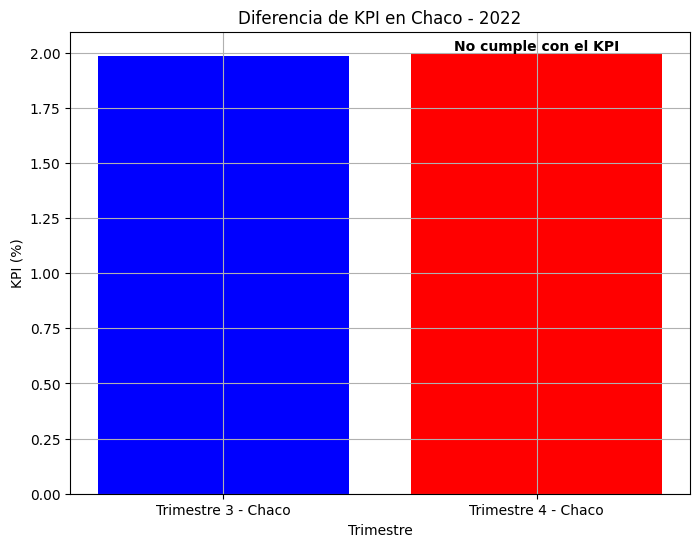

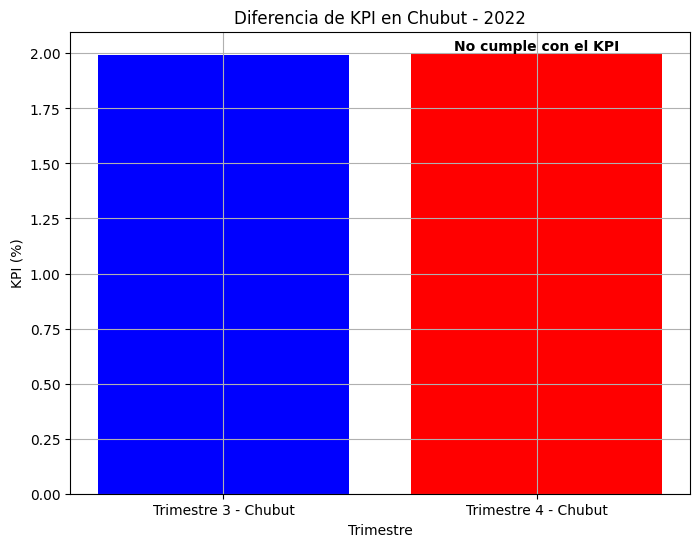

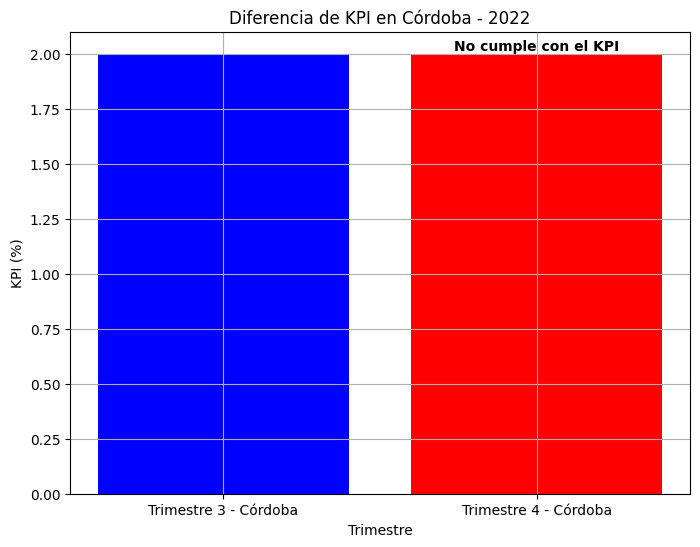

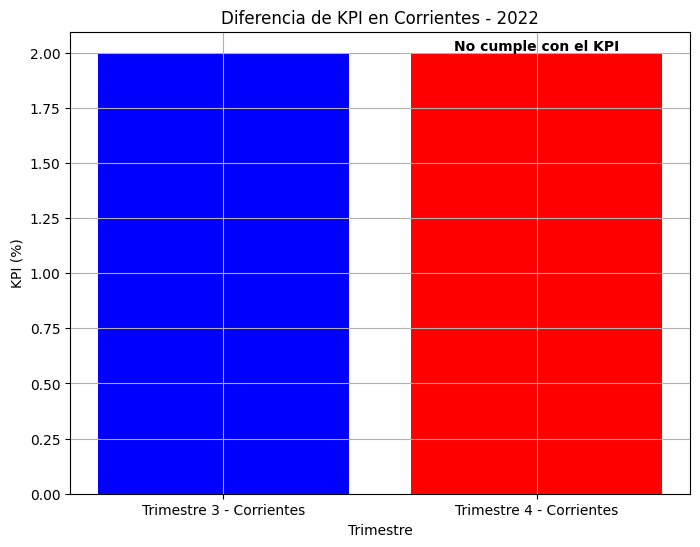

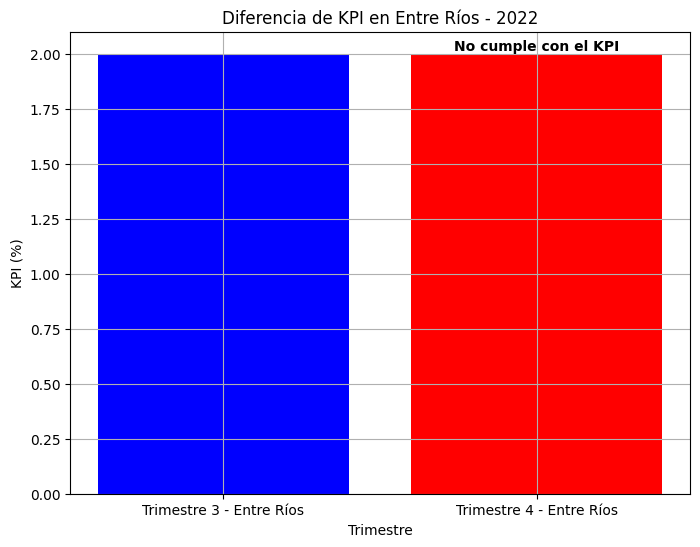

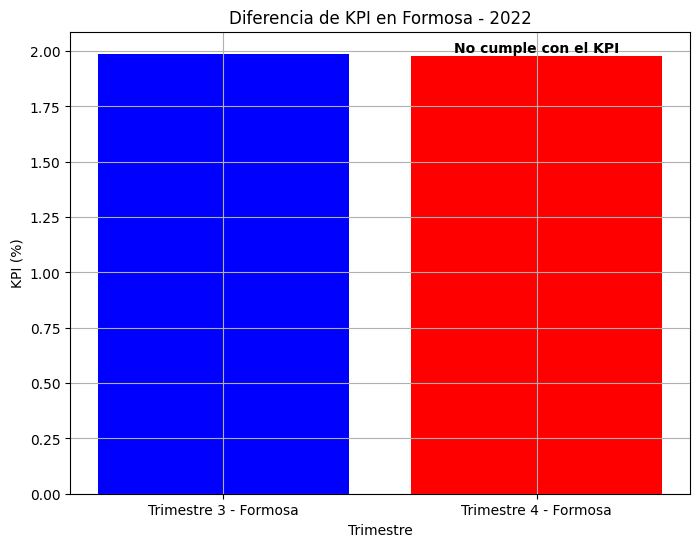

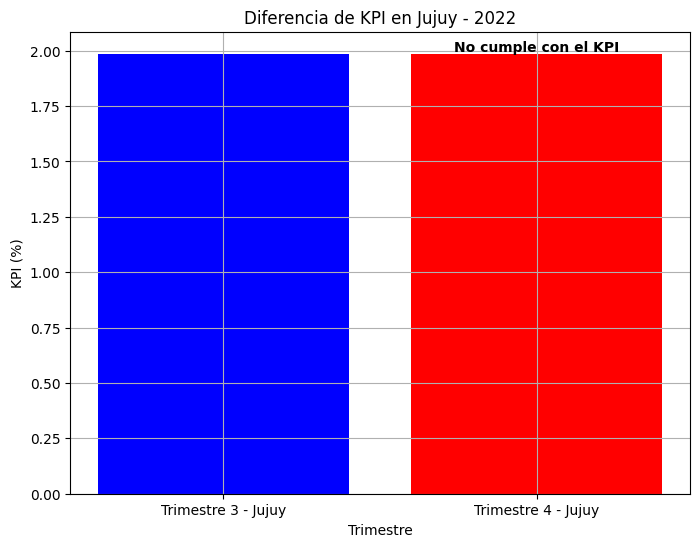

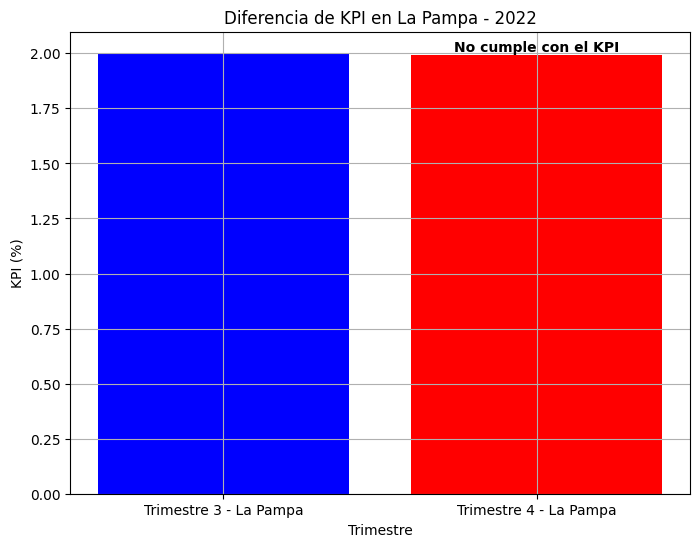

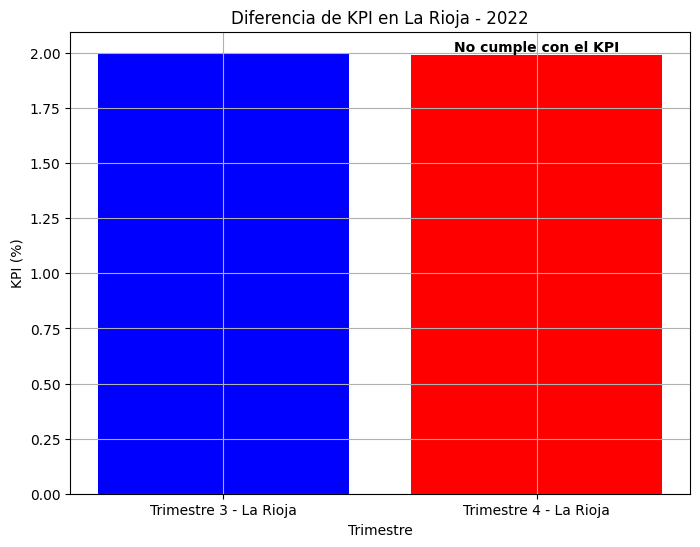

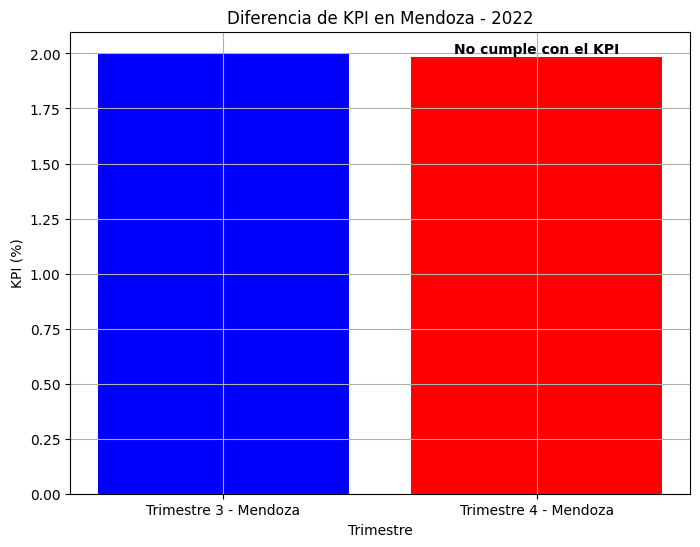

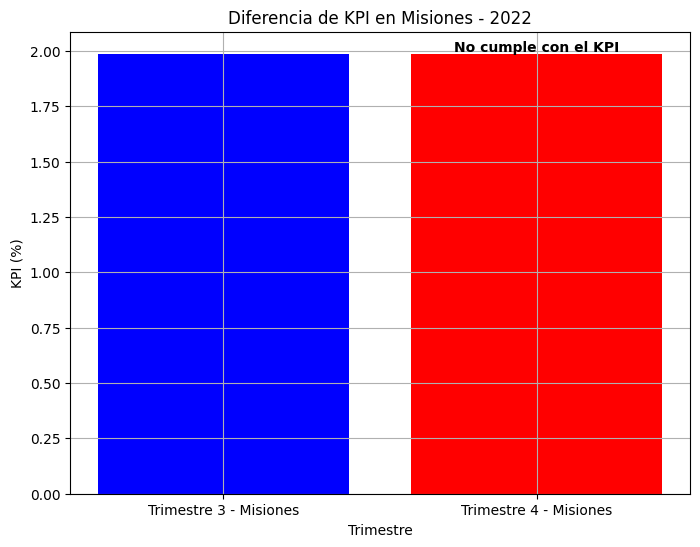

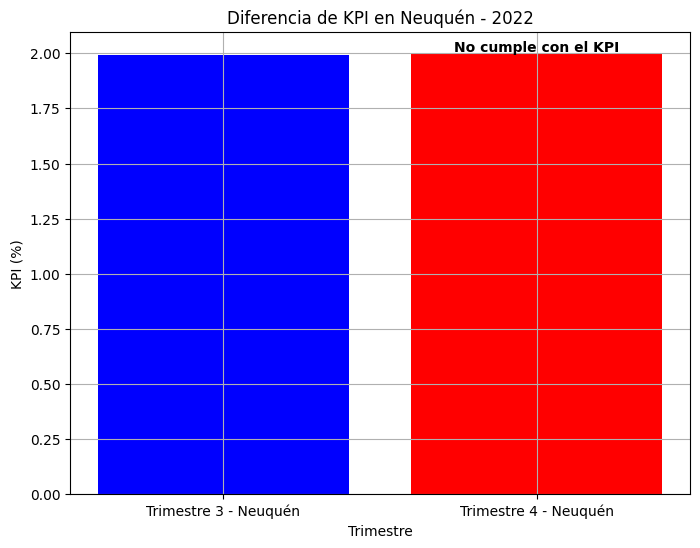

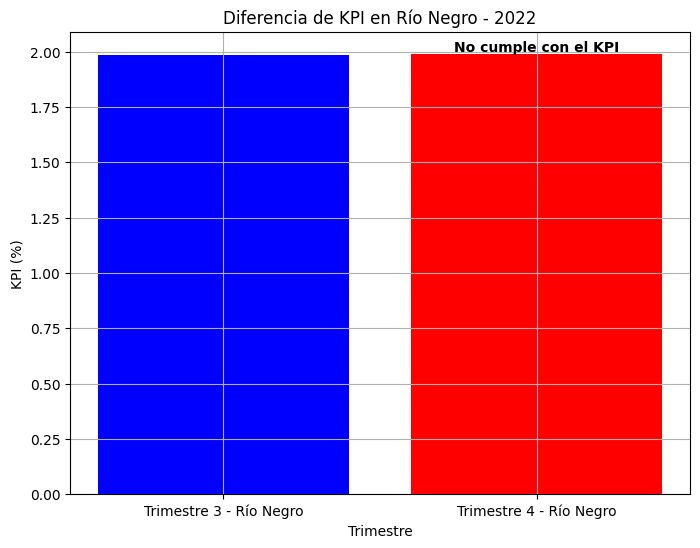

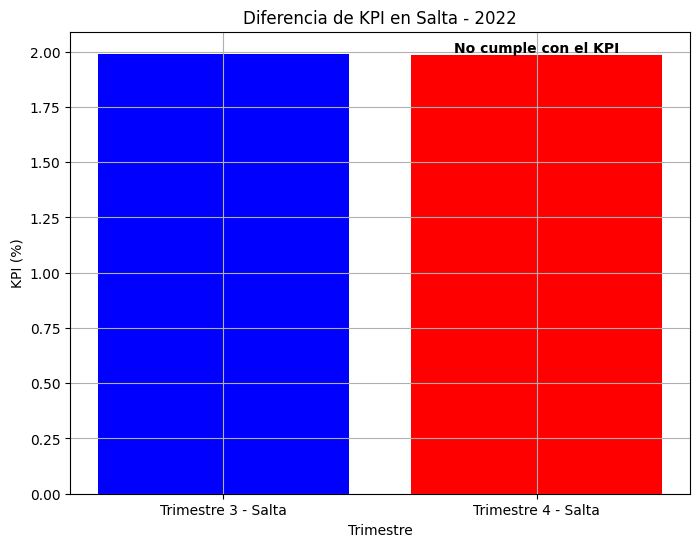

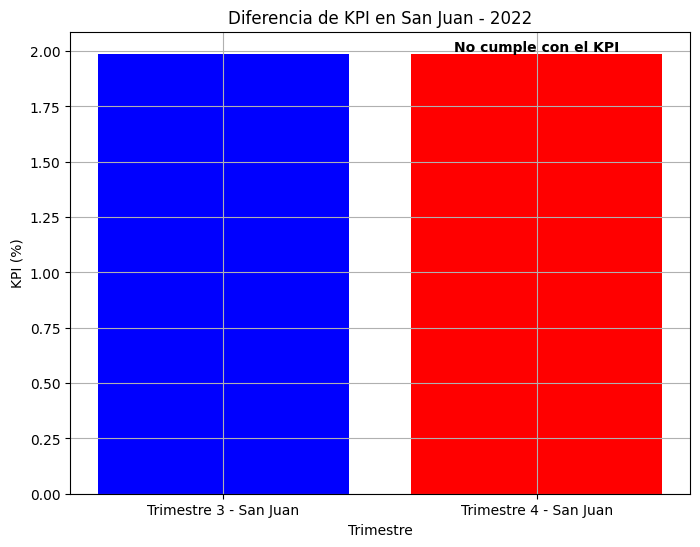

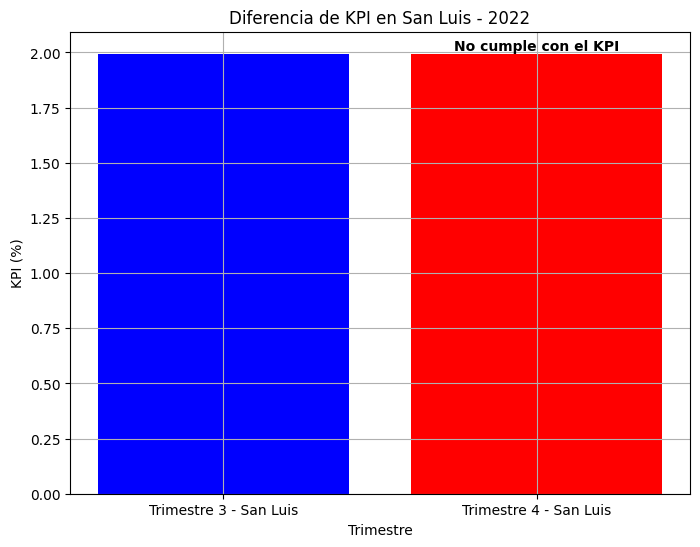

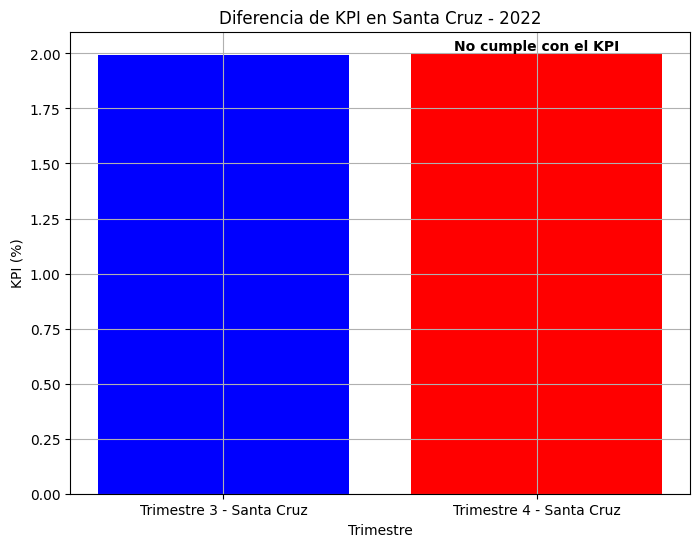

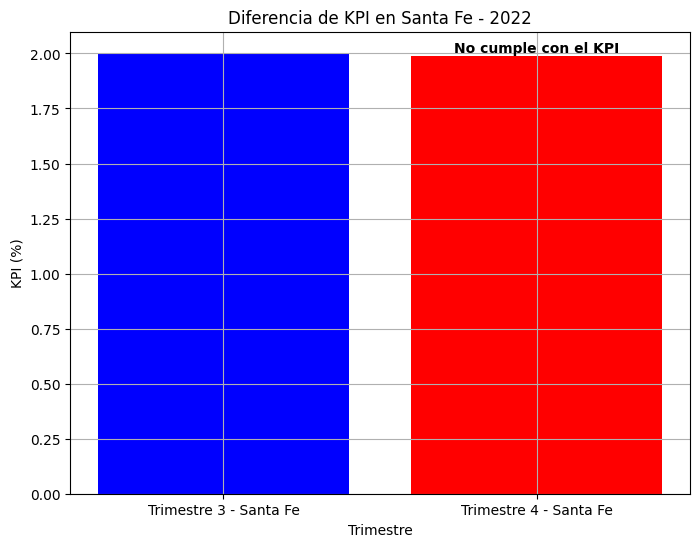

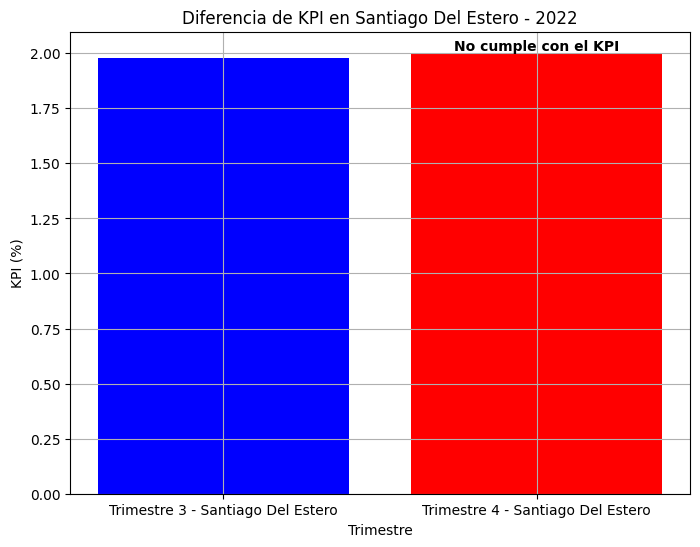

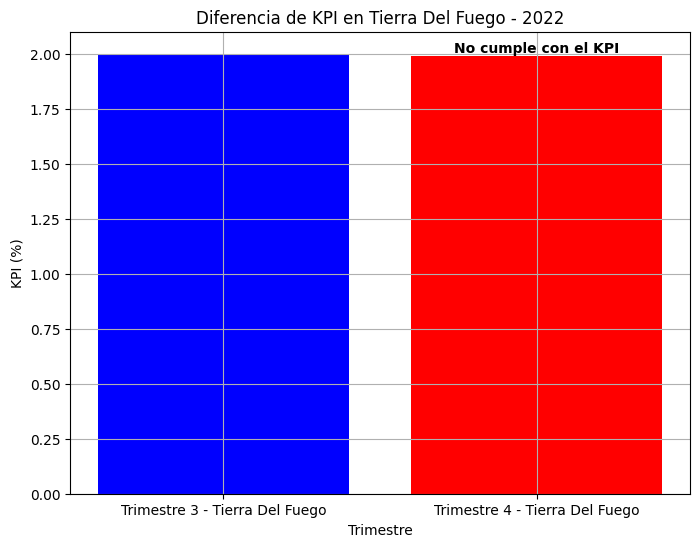

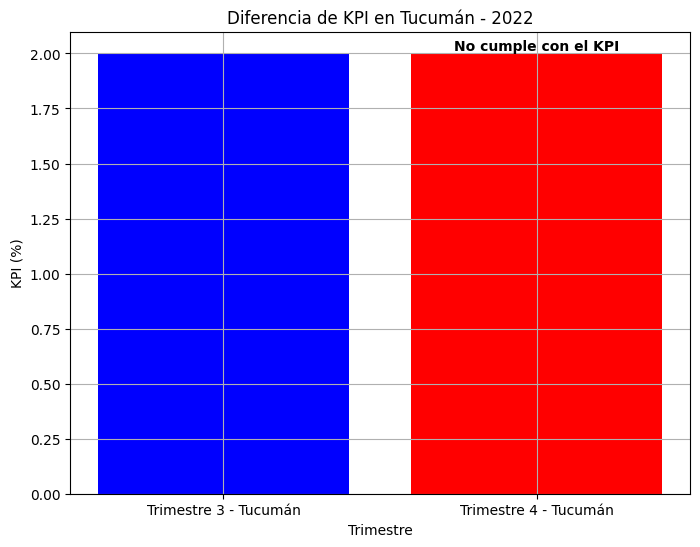

In [21]:
# Filtro los datos para incluir solo los dos últimos trimestres del año 2022
filtered_df_2022 = merged_df[(merged_df['Año'] == 2022) & ((merged_df['Trimestre'] == 3) | (merged_df['Trimestre'] == 4))].copy()

# Calculo la diferencia porcentual entre el tercer y cuarto trimestre
kpi_third = filtered_df_2022[filtered_df_2022['Trimestre'] == 3].set_index('Provincia')['KPI']
kpi_fourth = filtered_df_2022[filtered_df_2022['Trimestre'] == 4].set_index('Provincia')['KPI']

filtered_df_2022['Diferencia Porcentual'] = ((kpi_fourth - kpi_third) / kpi_third) * 100

# Creo gráficas separadas para cada provincia
for provincia in filtered_df_2022['Provincia'].unique():
    provincia_df = filtered_df_2022[filtered_df_2022['Provincia'] == provincia]
    
    kpi_diff = provincia_df[provincia_df['Trimestre'] == 4]['Diferencia Porcentual'].values[0]
    
    plt.figure(figsize=(8, 6))
    bars = plt.bar([f'Trimestre 3 - {provincia}', f'Trimestre 4 - {provincia}'], [kpi_third[provincia], kpi_fourth[provincia]], color=['blue', 'red'])
    
    # Agrego etiqueta de cumple o no cumple con el KPI del 2%
    if kpi_diff >= 2:
        label = 'Cumple con el KPI'
    else:
        label = 'No cumple con el KPI'
    
    plt.text(bars[1].get_x() + bars[1].get_width() / 2, kpi_fourth[provincia], label, ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')
    
    plt.title(f'Diferencia de KPI en {provincia} - 2022')
    plt.xlabel('Trimestre')
    plt.ylabel('KPI (%)')
    plt.grid(True)
    plt.show()


## Análisis y Cálculos de Datos - Trimestres Finales del 2022

### Cálculo de Diferencia Porcentual del KPI
### cálculo la diferencia porcentual entre el tercer y cuarto trimestre del KPI para cada provincia y agrego esta información como una nueva columna llamada 'Diferencia Porcentual'

### Cálculo de Nuevo Acceso y KPI
### cálculo el nuevo acceso y el KPI utilizando las fórmulas proporcionadas. Estos valores se agregan como nuevas columnas al DataFrame.

### Con esta tabla puedo verificar la información de la grafica anterior y corroborrar el resultado final de KPI

In [22]:
# Filtro los datos para incluir solo los dos últimos trimestres del año 2022
filtered_df_2022 = merged_df[(merged_df['Año'] == 2022) & ((merged_df['Trimestre'] == 3) | (merged_df['Trimestre'] == 4))].copy()

# Calcula la diferencia porcentual entre el tercer y cuarto trimestre
kpi_third = filtered_df_2022[filtered_df_2022['Trimestre'] == 3].set_index('Provincia')['KPI']
kpi_fourth = filtered_df_2022[filtered_df_2022['Trimestre'] == 4].set_index('Provincia')['KPI']

filtered_df_2022.loc[:, 'Diferencia Porcentual'] = ((kpi_fourth - kpi_third) / kpi_third) * 100

# Calcula el nuevo acceso y el KPI usando la fórmula proporcionada
filtered_df_2022.loc[:, 'Nuevo Acceso'] = ((filtered_df_2022['Accesos por cada 100 hogares'] * 100) * (1 + 0.02)).astype(int)
filtered_df_2022.loc[:, 'KPI'] = ((filtered_df_2022['Nuevo Acceso'] - filtered_df_2022['Accesos por cada 100 hogares'] * 100) / (filtered_df_2022['Accesos por cada 100 hogares'] * 100)) * 100

# Muestra la tabla resultante
tabla_resultante = filtered_df_2022[['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares', 'Nuevo Acceso', 'KPI']]
tabla_resultante


,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Nuevo Acceso,KPI
0,2022,4,Buenos Aires,78.94,8051,1.988852
1,2022,4,Capital Federal,122.73,12518,1.996252
2,2022,4,Catamarca,65.77,6708,1.99179
3,2022,4,Chaco,43.62,4449,1.994498
4,2022,4,Chubut,85.57,8728,1.998364
5,2022,4,Córdoba,89.03,9081,1.999326
6,2022,4,Corrientes,51.64,5267,1.994578
7,2022,4,Entre Ríos,64.01,6529,1.999688
8,2022,4,Formosa,39.41,4019,1.979193
9,2022,4,Jujuy,58.46,5962,1.984263


## Ninguna de las provincias cumple con el KPI propuesto del 2%.

## KPI (2): aumentar en un 1.5 % el  Cambio en Accesos TV por Suscripción por cada 100 Hogares entre Trimestres por provincia en el ultimo año.
###  Con este KPI se pretende evaluar cómo varían los accesos de televisión por suscripción en cada provincia a lo largo del tiempo, específicamente en el último año (2022).

### Realizó la extracción del archivo Television.csv y creo el dataFrame.

In [57]:
df_tv = pd.read_csv('dataset/Television.csv')
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Año                                              864 non-null    int64  
 1   Trimestre                                        864 non-null    int64  
 2   Provincia                                        864 non-null    object 
 3   Accesos TV por suscripción por cada 100 hab      864 non-null    float64
 4   Accesos TV por suscripción por cada 100 hogares  864 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 33.9+ KB


In [58]:
df_tv.head()

,Año,Trimestre,Provincia,Accesos TV por suscripción por cada 100 hab,Accesos TV por suscripción por cada 100 hogares
0,2022,4,Buenos Aires,1.653,"4.883,00"
1,2022,4,Capital Federal,2.397,"5.844,00"
2,2022,4,Catamarca,1.282,"5.039,00"
3,2022,4,Chaco,1.006,"3.765,00"
4,2022,4,Chubut,1.252,"4.084,00"


In [59]:
# Elimino puntos de separación de miles y convierto la columna a tipo float
df_tv['Accesos TV por suscripción por cada 100 hogares'] = df_tv['Accesos TV por suscripción por cada 100 hogares'].str.replace('.', '').str.replace(',', '.').astype(float)


df_tv.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Año                                              864 non-null    int64  
 1   Trimestre                                        864 non-null    int64  
 2   Provincia                                        864 non-null    object 
 3   Accesos TV por suscripción por cada 100 hab      864 non-null    float64
 4   Accesos TV por suscripción por cada 100 hogares  864 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 33.9+ KB


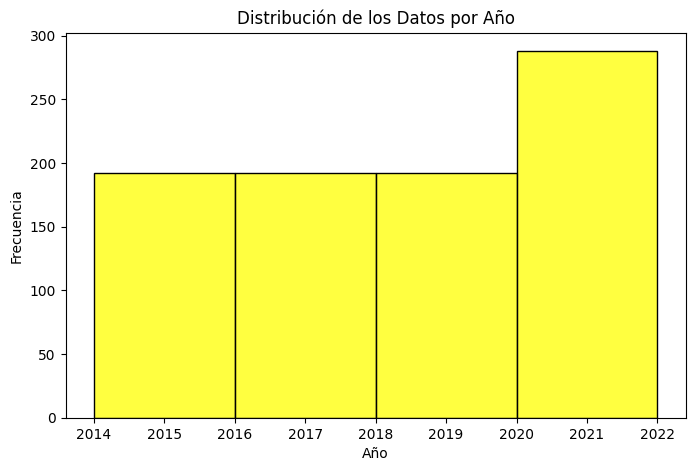

In [60]:
# Grafico la distribución del campo 'Año'
plt.figure(figsize=(8, 5))
sns.histplot(df_tv['Año'], bins=4, kde=False, color='yellow')
plt.title('Distribución de los Datos por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

In [61]:
# Organizo el dataFrame por año y trimestre de menor a mayor.
df_tv.sort_values(by=['Año', 'Trimestre'], inplace=True)
df_tv


,Año,Trimestre,Provincia,Accesos TV por suscripción por cada 100 hab,Accesos TV por suscripción por cada 100 hogares
840,2014,1,Buenos Aires,1.434,4707.0
841,2014,1,Capital Federal,2.268,5971.0
842,2014,1,Catamarca,464.000,1825.0
843,2014,1,Chaco,779.000,2918.0
844,2014,1,Chubut,1.234,4033.0
...,...,...,...,...,...
19,2022,4,Santa Cruz,952.000,3199.0
20,2022,4,Santa Fe,2.125,6759.0
21,2022,4,Santiago Del Estero,1.533,6178.0
22,2022,4,Tierra Del Fuego,2.398,8091.0


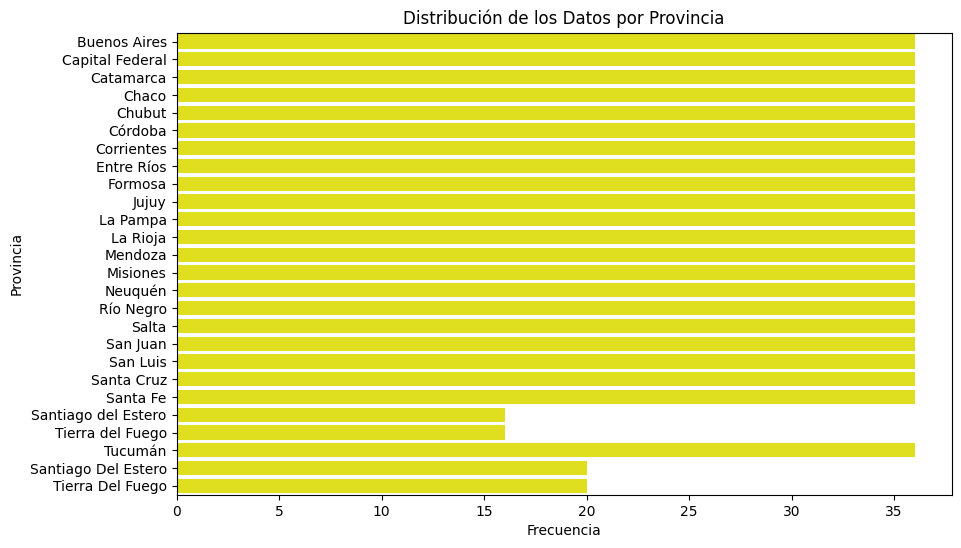

In [62]:
# Grafico la distribución del campo 'Provincia'
plt.figure(figsize=(10, 6))
sns.countplot(y='Provincia', data=df_tv, color='yellow')
plt.title('Distribución de los Datos por Provincia')
plt.xlabel('Frecuencia')
plt.ylabel('Provincia')
plt.show()

In [63]:


# Verifico la distribución de provincias
distribucion_provincias = df_tv['Provincia'].value_counts()

# Imprimo la distribución
distribucion_provincias


Provincia
Buenos Aires           36
Mendoza                36
Tucumán                36
Santa Fe               36
Santa Cruz             36
San Luis               36
San Juan               36
Salta                  36
Río Negro              36
Neuquén                36
Capital Federal        36
Misiones               36
La Rioja               36
La Pampa               36
Jujuy                  36
Formosa                36
Entre Ríos             36
Corrientes             36
Córdoba                36
Chubut                 36
Chaco                  36
Catamarca              36
Santiago Del Estero    20
Tierra Del Fuego       20
Santiago del Estero    16
Tierra del Fuego       16
Name: count, dtype: int64

## Variación en Ocurrencias para Santiago Del Estero y Tierra Del Fuego:
### Santiago Del Estero y Tierra Del Fuego tienen 20 ocurrencias cada una. Sin embargo, se observa una variación en la capitalización de los nombres, donde "Santiago Del Estero" y "Tierra Del Fuego" (con mayúsculas) tienen 20 ocurrencias, mientras que "Santiago del Estero" y "Tierra del Fuego" (en minúsculas) tienen 16 ocurrencias cada una.

In [64]:
# Estandarizo la capitalización
df_tv['Provincia'] = df_tv['Provincia'].str.title()

# Verifico la distribución actualizada
distribucion_actualizada = df_tv['Provincia'].value_counts()

# Imprimo la distribución actualizada
print(distribucion_actualizada)

Provincia
Buenos Aires           36
Capital Federal        36
Tierra Del Fuego       36
Santiago Del Estero    36
Santa Fe               36
Santa Cruz             36
San Luis               36
San Juan               36
Salta                  36
Río Negro              36
Neuquén                36
Misiones               36
Mendoza                36
La Rioja               36
La Pampa               36
Jujuy                  36
Formosa                36
Entre Ríos             36
Corrientes             36
Córdoba                36
Chubut                 36
Chaco                  36
Catamarca              36
Tucumán                36
Name: count, dtype: int64


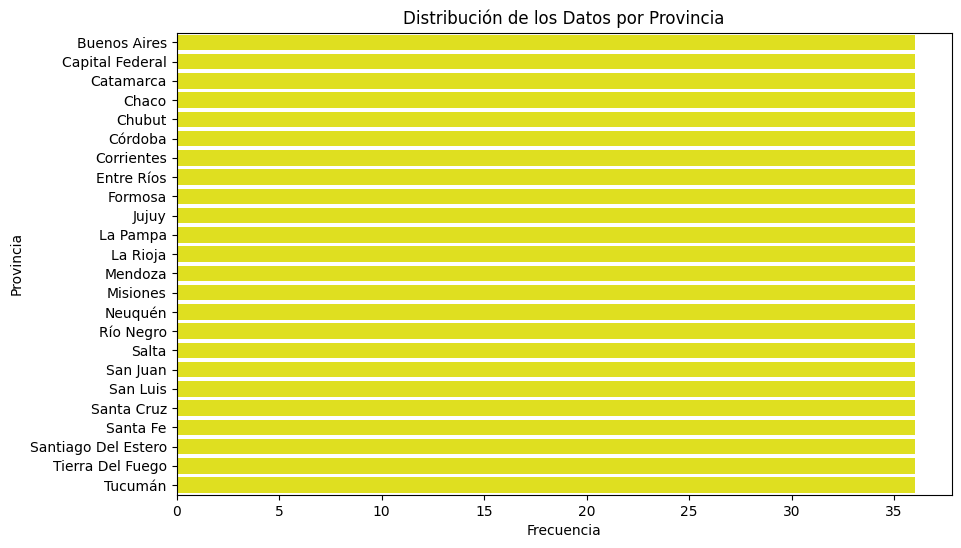

In [65]:
# Grafico nuevamente la distribución del campo 'Provincia' para verificar la corrección.
plt.figure(figsize=(10, 6))
sns.countplot(y='Provincia', data=df_tv, color='yellow')
plt.title('Distribución de los Datos por Provincia')
plt.xlabel('Frecuencia')
plt.ylabel('Provincia')
plt.show()

In [67]:
# Filtro el último año 
ultimo_anio = df_tv['Año'].max()
df_ultimo_anio = df_tv[df_tv['Año'] == ultimo_anio]
df_ultimo_anio


,Año,Trimestre,Provincia,Accesos TV por suscripción por cada 100 hab,Accesos TV por suscripción por cada 100 hogares
72,2022,1,Buenos Aires,1.670,4970.0
73,2022,1,Capital Federal,2.419,5878.0
74,2022,1,Catamarca,1.118,4397.0
75,2022,1,Chaco,978.000,3661.0
76,2022,1,Chubut,1.222,3988.0
...,...,...,...,...,...
19,2022,4,Santa Cruz,952.000,3199.0
20,2022,4,Santa Fe,2.125,6759.0
21,2022,4,Santiago Del Estero,1.533,6178.0
22,2022,4,Tierra Del Fuego,2.398,8091.0


In [70]:
# Calculo el KPI (aumento del 1.5%) usando .loc
df_ultimo_anio.loc[:, 'KPI_Propuesto'] = 1.5
df_ultimo_anio


,Año,Trimestre,Provincia,Accesos TV por suscripción por cada 100 hab,Accesos TV por suscripción por cada 100 hogares,KPI_Propuesto
72,2022,1,Buenos Aires,1.670,4970.0,1.5
73,2022,1,Capital Federal,2.419,5878.0,1.5
74,2022,1,Catamarca,1.118,4397.0,1.5
75,2022,1,Chaco,978.000,3661.0,1.5
76,2022,1,Chubut,1.222,3988.0,1.5
...,...,...,...,...,...,...
19,2022,4,Santa Cruz,952.000,3199.0,1.5
20,2022,4,Santa Fe,2.125,6759.0,1.5
21,2022,4,Santiago Del Estero,1.533,6178.0,1.5
22,2022,4,Tierra Del Fuego,2.398,8091.0,1.5


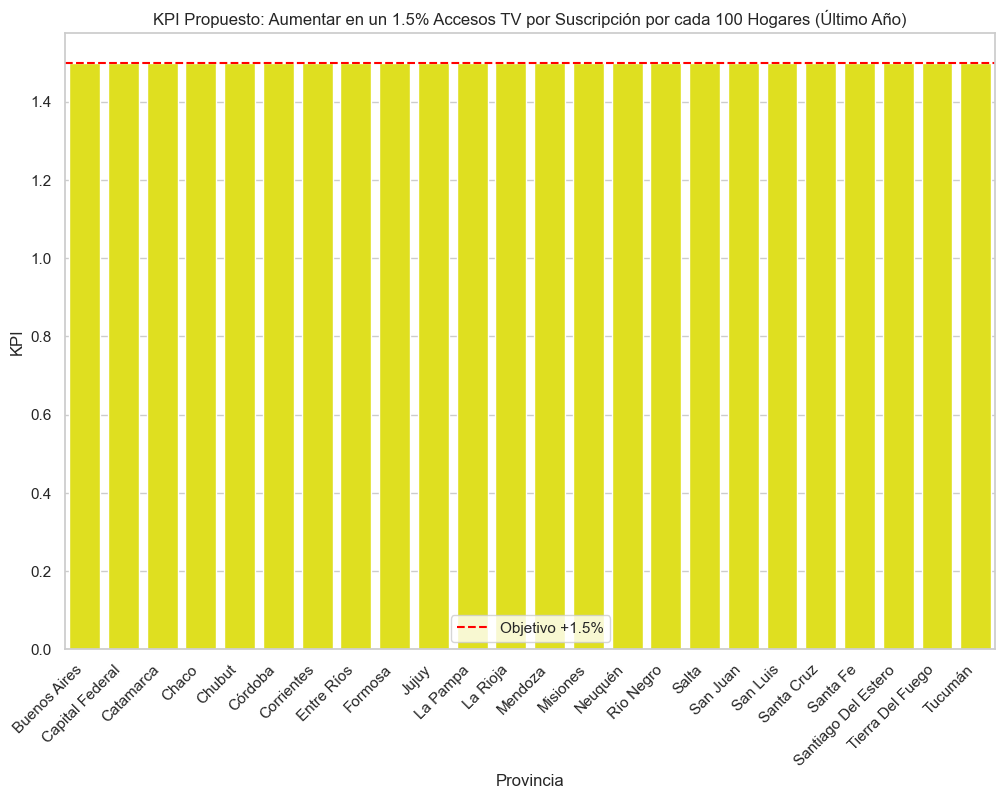

In [72]:
# Configuro el estilo de los gráficos con Seaborn
sns.set(style="whitegrid")

# Grafico el KPI propuesto por provincia
plt.figure(figsize=(12, 8))
sns.barplot(x='Provincia', y='KPI_Propuesto', data=df_ultimo_anio, color='yellow')
plt.title('KPI Propuesto: Aumentar en un 1.5% Accesos TV por Suscripción por cada 100 Hogares (Último Año)')
plt.xlabel('Provincia')
plt.ylabel('KPI')
plt.xticks(rotation=45, ha='right')  
plt.axhline(y=1.5, color='red', linestyle='--', label='Objetivo +1.5%')  # Línea roja para el objetivo del KPI
plt.legend()
plt.show()

In [78]:
# Creo una copia del dataFrame df_ultimo_anio
df_ultimo_anio = df_ultimo_anio.copy()
df_ultimo_anio['Cumple_KPI'] = df_ultimo_anio['Accesos TV por suscripción por cada 100 hogares'] >= 1.5


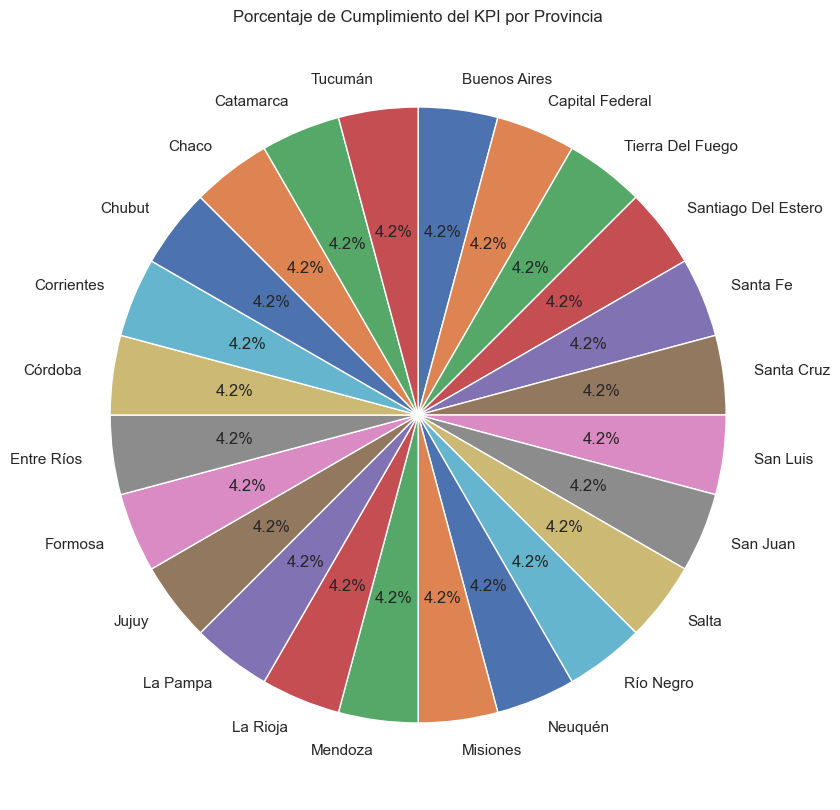

In [89]:


# Calculo el porcentaje total de cumplimiento del KPI por provincia
porcentaje_cumplimiento = df_ultimo_anio.groupby('Provincia')['Cumple_KPI'].mean() * 100

# Creo el grafico de torta
plt.figure(figsize=(19, 10))
porcentaje_cumplimiento.sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Porcentaje de Cumplimiento del KPI por Provincia')
plt.ylabel('')  # Elimino la etiqueta del eje y
plt.show()


In [88]:


# Calculo el porcentaje total de cumplimiento del KPI por provincia
porcentaje_cumplimiento = df_ultimo_anio.groupby('Provincia')['Cumple_KPI'].mean() * 100

# Creo un DataFrame con la información
df_porcentaje_cumplimiento = pd.DataFrame({
    'Provincia': porcentaje_cumplimiento.index,
    'Porcentaje Cumplimiento': porcentaje_cumplimiento.values
})


df_porcentaje_cumplimiento


,Provincia,Porcentaje Cumplimiento
0,Buenos Aires,100.0
1,Capital Federal,100.0
2,Catamarca,100.0
3,Chaco,100.0
4,Chubut,100.0
5,Corrientes,100.0
6,Córdoba,100.0
7,Entre Ríos,100.0
8,Formosa,100.0
9,Jujuy,100.0


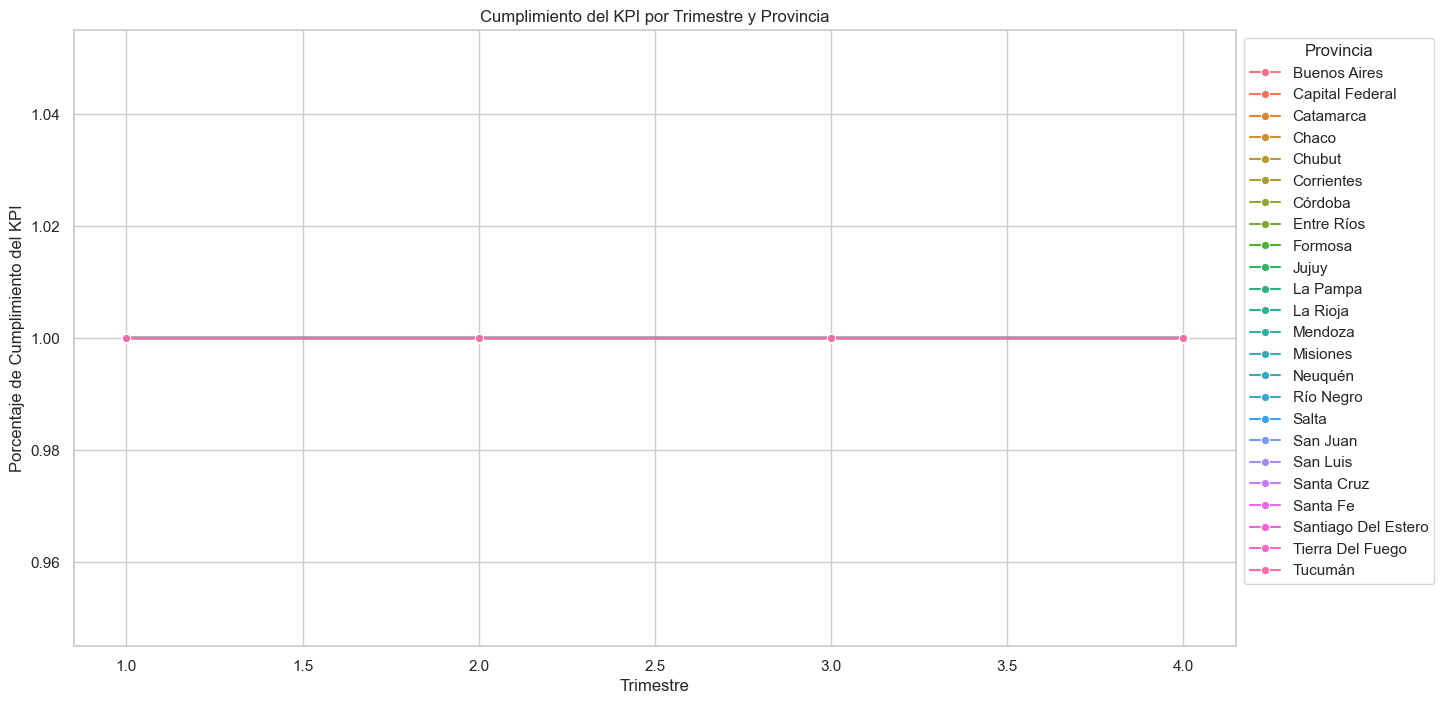

In [90]:


# Agrupo por provincia y calculo el promedio de cumplimiento del KPI por trimestre
promedio_cumplimiento_trimestral = df_ultimo_anio.groupby(['Provincia', 'Año', 'Trimestre'])['Cumple_KPI'].mean().reset_index()

# Creo un gráfico de líneas por provincia
plt.figure(figsize=(15, 8))
sns.lineplot(x='Trimestre', y='Cumple_KPI', hue='Provincia', data=promedio_cumplimiento_trimestral, marker='o')
plt.title('Cumplimiento del KPI por Trimestre y Provincia')
plt.xlabel('Trimestre')
plt.ylabel('Porcentaje de Cumplimiento del KPI')
plt.legend(title='Provincia', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


### El análisis, ha determinado que todas las provincias han cumplido con el KPI en un 100%. Este resultado es indicativo de un desempeño sobresaliente en la provisión de servicios de TV por suscripción en el período estudiado.

### La evaluación del cumplimiento del KPI se basó en el cálculo de un porcentaje para cada provincia. Este porcentaje representa la proporción de trimestres en los cuales se cumplió con el KPI con respecto al total de trimestres analizados. todas las provicias sobrepasan el 1.5% .
